<a href="https://colab.research.google.com/github/Peralta1103/MDA-620-Data-Driven-Decision-Making-Capstone-Project-/blob/main/Credit%20Risk%20Assessment%20Using%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load dataset
data_file = '/content/credit_risk_dataset.csv'
data = pd.read_csv(data_file)

In [46]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [48]:
# Get duplicates and remove them
data.duplicated().sum()

165

In [49]:
data = data.drop_duplicates()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [51]:
print(data.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [52]:
#replace null columns
missing_columns = ['person_emp_length', 'loan_int_rate']

data[missing_columns] = data[missing_columns].fillna(data[missing_columns].median())

In [53]:
print(data.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [54]:
#encode categorical features
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

for feature, le in label_encoders.items():
    print(f"Feature: {feature}")
    print("Original Categories:", le.classes_)
    print("Encoded Values:", data[feature].unique())
    print()

Feature: person_home_ownership
Original Categories: ['MORTGAGE' 'OTHER' 'OWN' 'RENT']
Encoded Values: [3 2 0 1]

Feature: loan_intent
Original Categories: ['DEBTCONSOLIDATION' 'EDUCATION' 'HOMEIMPROVEMENT' 'MEDICAL' 'PERSONAL'
 'VENTURE']
Encoded Values: [4 1 3 5 2 0]

Feature: loan_grade
Original Categories: ['A' 'B' 'C' 'D' 'E' 'F' 'G']
Encoded Values: [3 1 2 0 4 5 6]

Feature: cb_person_default_on_file
Original Categories: ['N' 'Y']
Encoded Values: [1 0]



In [55]:
# Define target and feature columns
target = 'loan_status'
features = data.drop(target, axis=1).columns.tolist()

# Identify categorical and numerical features
numerical_features = list(set(features) - set(categorical_features))

# Summary statistics for numerical features
numerical_summary = data[numerical_features].describe().T
print("Summary Statistics for Numerical Features:")
print(numerical_summary)

# Summary statistics for categorical features (including label-encoded ones)
categorical_summary = data[categorical_features].describe().T
print("\nSummary Statistics for Categorical Features:")
print(categorical_summary)


Summary Statistics for Numerical Features:
                              count          mean           std      min  \
loan_int_rate               32416.0     11.014662      3.083050     5.42   
person_income               32416.0  66091.640826  62015.580269  4000.00   
loan_percent_income         32416.0      0.170250      0.106812     0.00   
loan_amnt                   32416.0   9593.845632   6322.730241   500.00   
cb_person_cred_hist_length  32416.0      5.811297      4.059030     2.00   
person_emp_length           32416.0      4.768880      4.090411     0.00   
person_age                  32416.0     27.747008      6.354100    20.00   

                                 25%       50%       75%         max  
loan_int_rate                   8.49     10.99     13.11       23.22  
person_income               38542.00  55000.00  79218.00  6000000.00  
loan_percent_income             0.09      0.15      0.23        0.83  
loan_amnt                    5000.00   8000.00  12250.00    3500

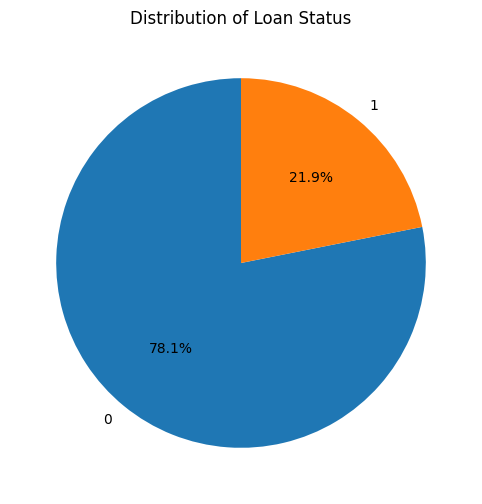

In [56]:
#Piechart
plt.figure(figsize=(8, 6))
data['loan_status'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Loan Status')
plt.ylabel('')
plt.show()

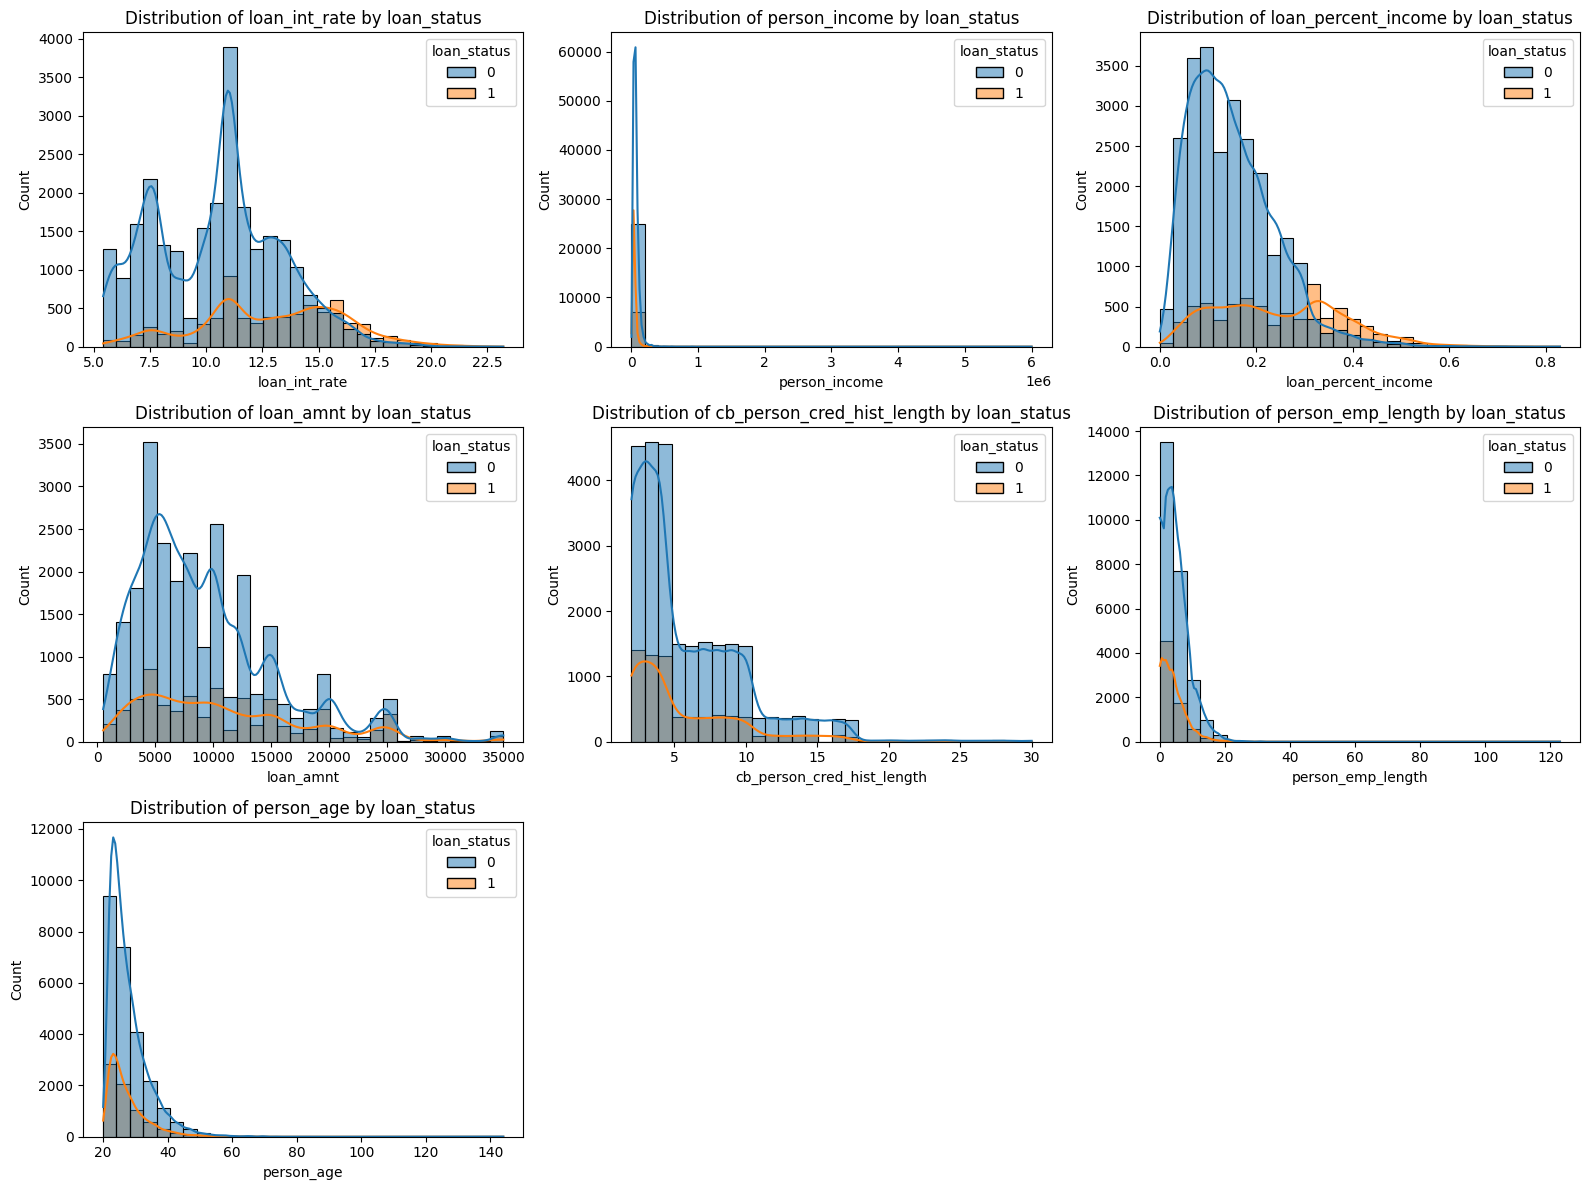

In [57]:
#Histograms
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=col, hue=target, kde=True, bins=30)
    plt.title(f'Distribution of {col} by {target}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

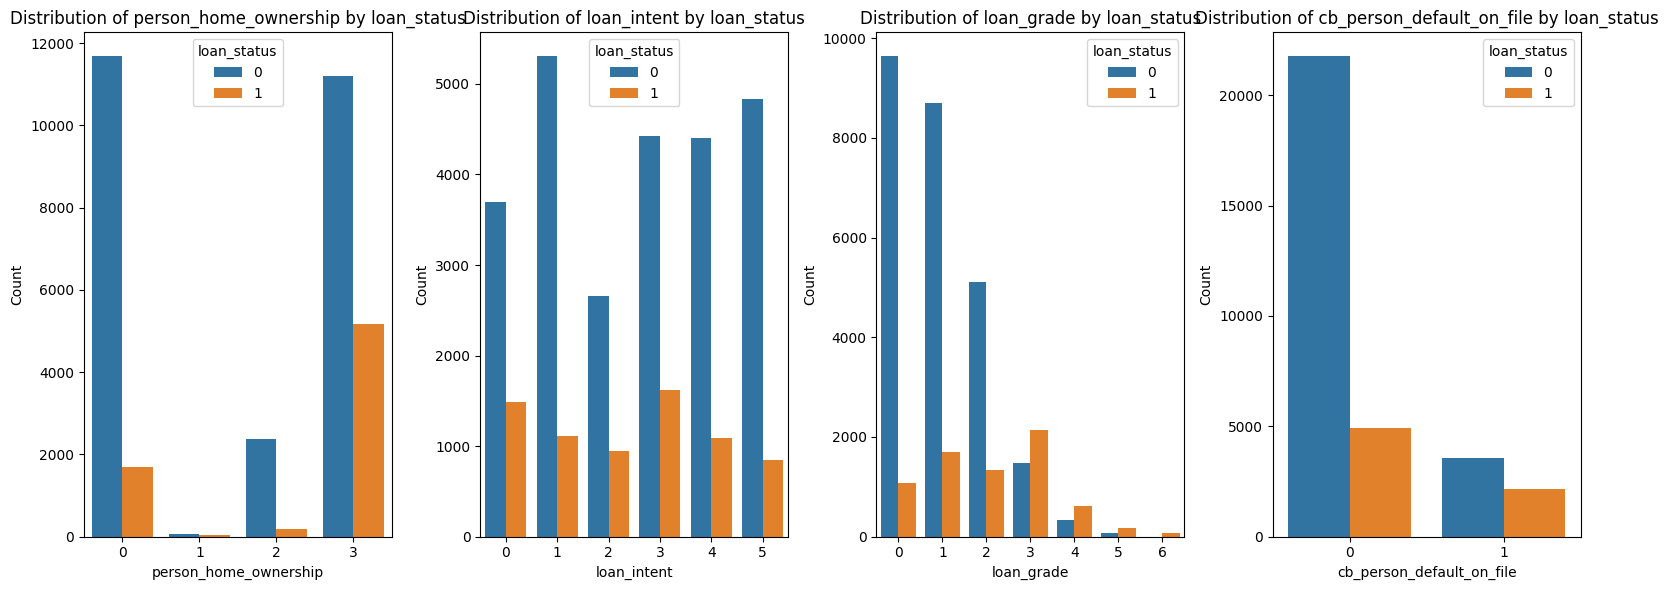

In [ ]:
plt.figure(figsize=(16, 6))

for i, col in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i+1)
    sns.countplot(x=col, data=data, hue=target)
    plt.title(f'Distribution of {col} by {target}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

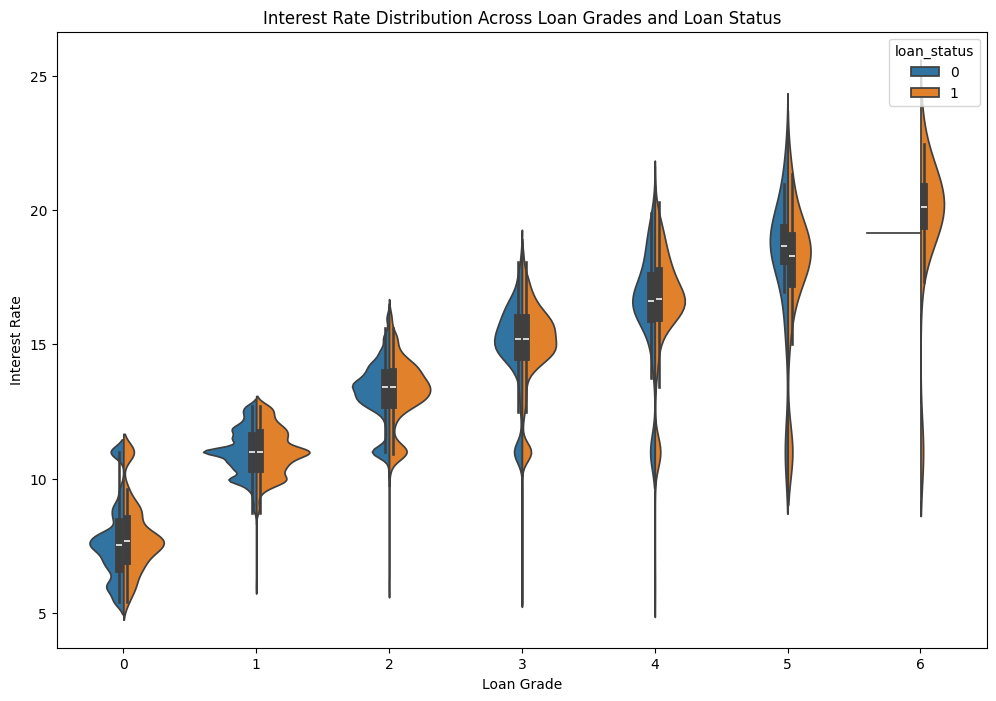

In [ ]:
#Violet chart
plt.figure(figsize=(12, 8))

sns.violinplot(x='loan_grade', y='loan_int_rate', hue='loan_status', data=data, split=True)
plt.title('Interest Rate Distribution Across Loan Grades and Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

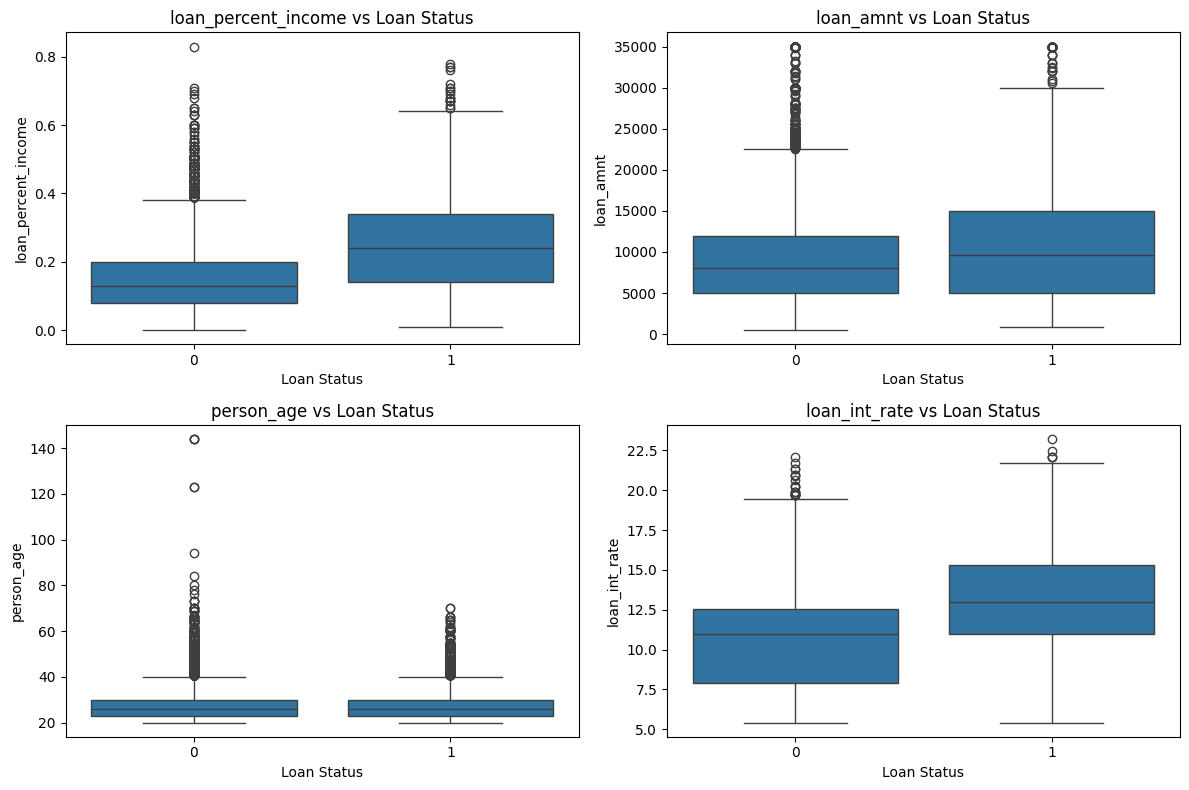

In [ ]:
#Boxplots
plt.figure(figsize=(12, 8))

for i, col in enumerate(['loan_percent_income', 'loan_amnt', 'person_age', 'loan_int_rate']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='loan_status', y=col, data=data)
    plt.title(f'{col} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

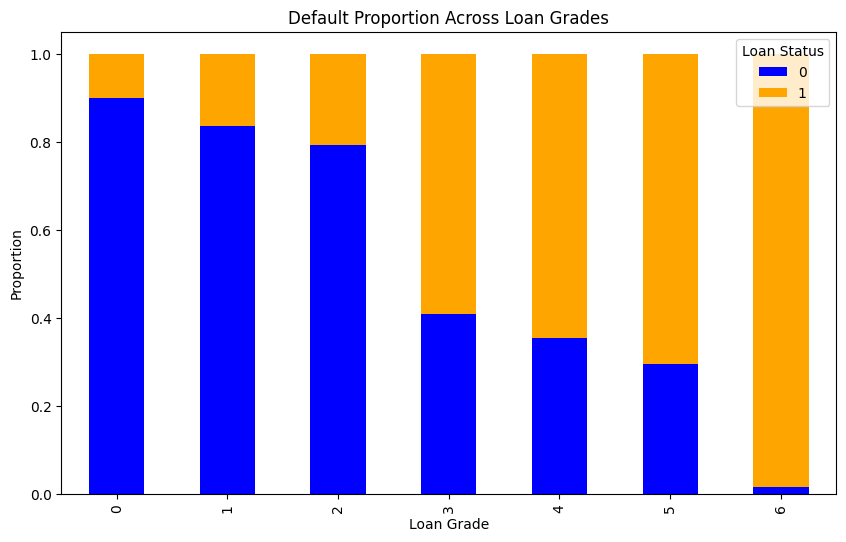

In [ ]:
grade_dist = data.groupby(['loan_grade', 'loan_status']).size().unstack()
grade_dist = grade_dist.div(grade_dist.sum(axis=1), axis=0)

grade_dist.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10, 6))
plt.title('Default Proportion Across Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Proportion')
plt.legend(title='Loan Status', loc='upper right')
plt.show()


loan_percent_income           0.379697
loan_int_rate                 0.320081
loan_amnt                     0.105736
cb_person_cred_hist_length   -0.016498
person_age                   -0.022698
person_emp_length            -0.082517
person_income                -0.145005
Name: loan_status, dtype: float64


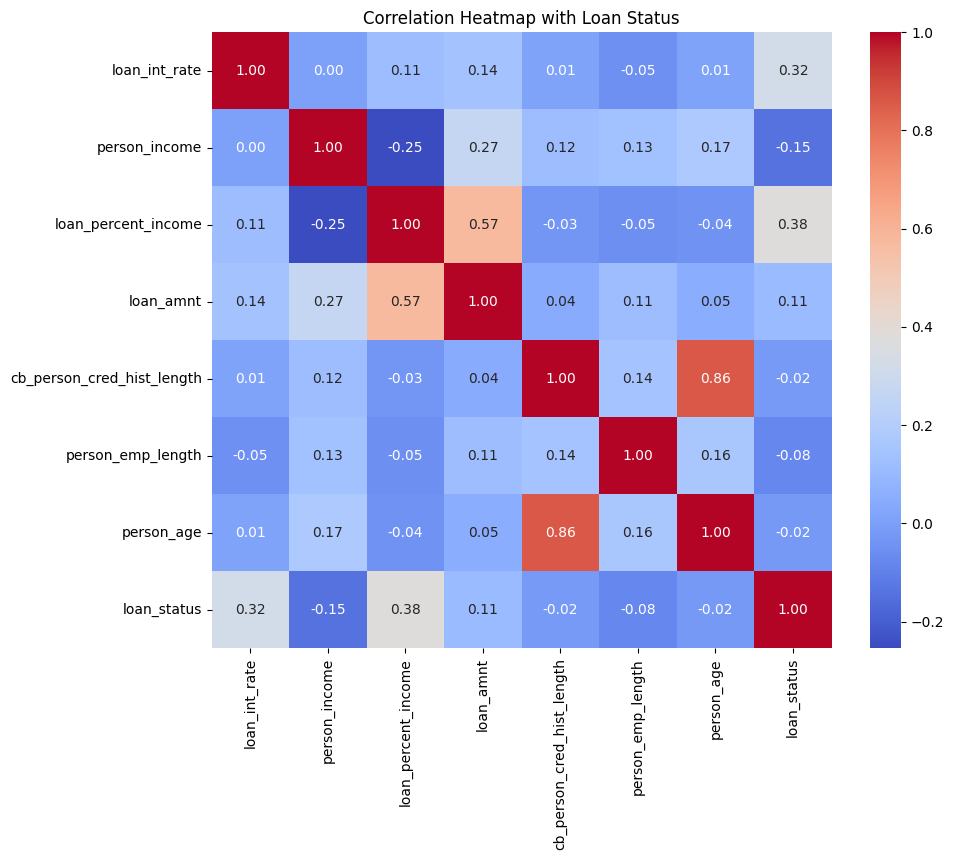

In [ ]:
# Calculate correlations between numerical features and the target
correlations = data[numerical_features + ['loan_status']].corr()

# Extract correlations of features with the target
target_corr = correlations['loan_status'].drop('loan_status')

# Display correlations
print(target_corr.sort_values(ascending=False))

# Plot heatmap for numerical features and target
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap with Loan Status')
plt.show()

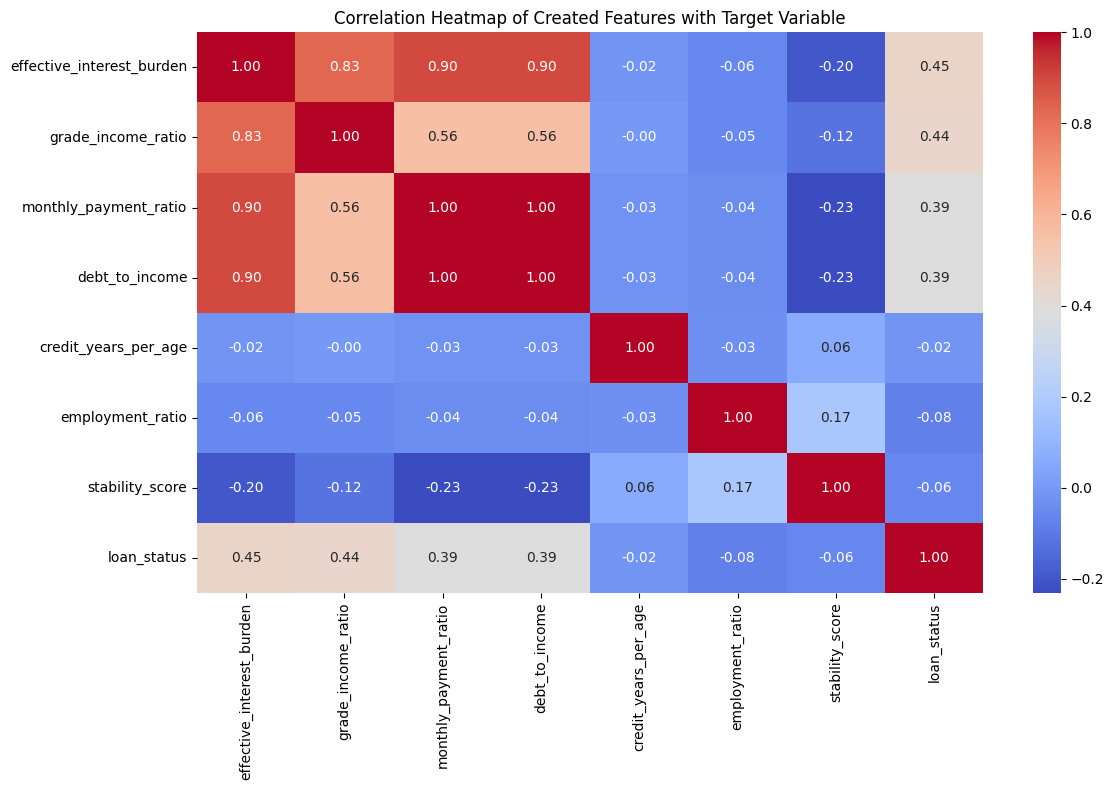

Selected Features with Correlation > 0.4:
 effective_interest_burden    0.454224
grade_income_ratio           0.442093
loan_status                  1.000000
Name: loan_status, dtype: float64


In [59]:
# Create new features
data['effective_interest_burden'] = (data['loan_int_rate'] * data['loan_amnt']) / data['person_income']
data['grade_income_ratio'] = data['loan_grade'] * data['loan_percent_income']
data['monthly_payment_ratio'] = data['loan_amnt'] / (data['person_income'] / 12)
data['debt_to_income'] = data['loan_amnt'] / data['person_income']
data['credit_years_per_age'] = data['cb_person_cred_hist_length'] / data['person_age']
data['employment_ratio'] = data['person_emp_length'] / data['person_age']
data['stability_score'] = (data['person_emp_length'] * data['person_income']) / \
                          (data['loan_amnt'] * data['loan_percent_income'])

# Correlation map for newly created features
created_features = [
    'effective_interest_burden', 'grade_income_ratio', 'monthly_payment_ratio',
    'debt_to_income', 'credit_years_per_age', 'employment_ratio', 'stability_score'
]

# Calculate correlations including the target variable
correlations = data[created_features + ['loan_status']].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Created Features with Target Variable')
plt.tight_layout()
plt.show()

# Filter features with correlation > 0.4
selected_features = correlations['loan_status'].loc[correlations['loan_status'] > 0.4].index.tolist()

# Display selected features and their correlations
print("Selected Features with Correlation > 0.4:\n", correlations['loan_status'][selected_features])


In [60]:
original_features = [
    'loan_amnt', 'person_income', 'loan_int_rate', 'loan_grade',
    'loan_percent_income', 'cb_person_cred_hist_length',
    'person_age', 'person_emp_length'
]

# Adding new features
updated_features = original_features + ['effective_interest_burden', 'grade_income_ratio']


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparing data
X = data[updated_features]
y = data['loan_status']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_logistic)
classification_rep = classification_report(y_test, y_pred_logistic)

# Print Results
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy:.2f}")  # Formats accuracy to two decimal places
print("\nClassification Report:\n", classification_rep)

Logistic Regression Results:
Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      5073
           1       0.69      0.45      0.54      1411

    accuracy                           0.84      6484
   macro avg       0.78      0.70      0.72      6484
weighted avg       0.82      0.84      0.82      6484



In [63]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_rep = classification_report(y_test, y_pred_rf)

# Print Results
print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print("\nClassification Report:\n", rf_classification_rep)


Random Forest Results:
Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      5073
           1       0.79      0.64      0.71      1411

    accuracy                           0.89      6484
   macro avg       0.85      0.80      0.82      6484
weighted avg       0.88      0.89      0.88      6484



In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_classification_rep = classification_report(y_test, y_pred_xgb)

# Print Results
print("XGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print("\nClassification Report:\n", xgb_classification_rep)


XGBoost Results:
Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      5073
           1       0.80      0.65      0.72      1411

    accuracy                           0.89      6484
   macro avg       0.86      0.80      0.82      6484
weighted avg       0.88      0.89      0.88      6484



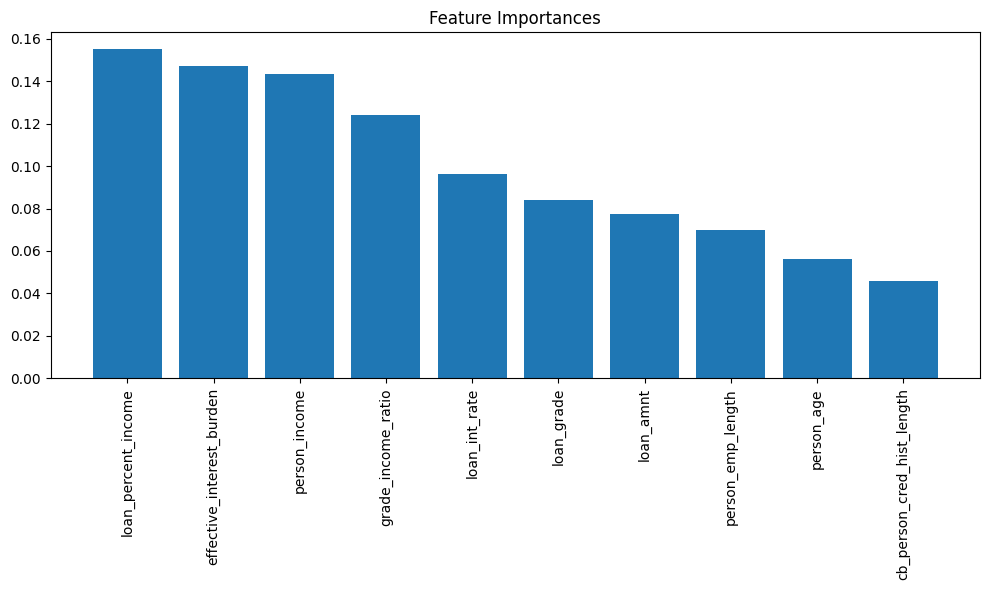

In [65]:
# Use the existing Random Forest model (make sure it's trained)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Feature Importances
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances[sorted_indices], align='center')
plt.xticks(range(len(features)), features[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [66]:
#Most important features
top_features = features[sorted_indices[:5]]

print("Top 5 Important Features:")
print(top_features)

Top 5 Important Features:
Index(['loan_percent_income', 'effective_interest_burden', 'person_income',
       'grade_income_ratio', 'loan_int_rate'],
      dtype='object')
